### Feature Scaling - Standardization

In [1]:
import pandas as pd #Data processing
import numpy as np #Leniar Algebra
import matplotlib.pyplot as plt #Visualization
import seaborn as sns 


In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df1=pd.read_csv('titanic.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df[['Age','EstimatedSalary','Purchased']]
df.sample(5)

,Age,EstimatedSalary,Purchased
182,32,117000,1
217,40,78000,0
162,37,33000,0
253,37,146000,1
176,35,47000,0


### Train test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)



In [6]:
X_train.shape,X_test.shape


((280, 2), (120, 2))

### StanderdScaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit the scaler to the training set,it will learn the parameters 
scaler.fit(X_train)
#transform the training set
X_train_scaled=scaler.transform(X_train)
#transform the test set
X_test_scaled=scaler.transform(X_test)

In [8]:
X_train_scaled
#it was a numpy array we can convert it into dataframe
X_train_scaled_df=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
X_test_scaled_df

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [10]:
np.round(X_train_scaled_df.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of Scaling

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

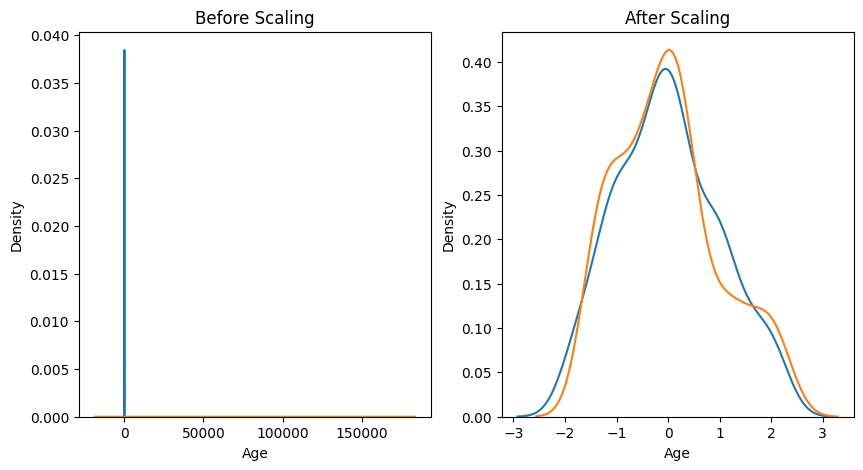

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(data=X_train, x='Age', ax=ax1)
sns.kdeplot(data=X_train, x='EstimatedSalary', ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(data=X_train_scaled_df, x='Age', ax=ax2)
sns.kdeplot(data=X_train_scaled_df, x='EstimatedSalary', ax=ax2)

### Comparison of Distributions

<Axes: title={'center': 'Age Distributions After Scaling'}, xlabel='Age', ylabel='Density'>

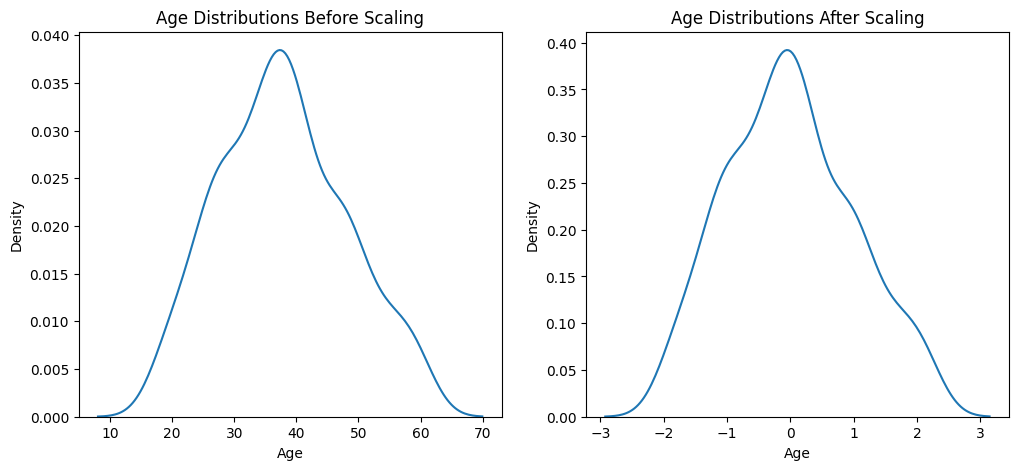

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
#Before Scaling
ax1.set_title('Age Distributions Before Scaling')
sns.kdeplot(data=X_train, x='Age', ax=ax1)
#After Scaling
ax2.set_title('Age Distributions After Scaling')
sns.kdeplot(data=X_train_scaled_df, x='Age', ax=ax2)

<Axes: title={'center': 'Estimated Salary Distributions After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

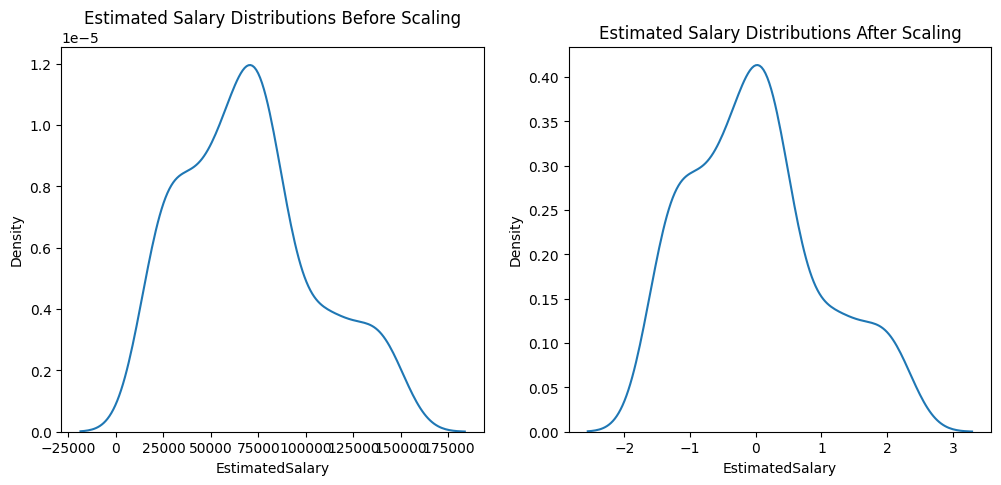

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
#Before Scaling
ax1.set_title('Estimated Salary Distributions Before Scaling')
sns.kdeplot(data=X_train, x='EstimatedSalary', ax=ax1)
#After Scaling
ax2.set_title('Estimated Salary Distributions After Scaling')
sns.kdeplot(data=X_train_scaled_df, x='EstimatedSalary', ax=ax2)

### Why scalinig is importent?

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [16]:
#Without Standardization
lr.fit(X_train, y_train)
#With Standardization
lr_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print('Accuracy without Standardization:', accuracy_score(y_test, y_pred))
print('Accuracy with Standardization:', accuracy_score(y_test, y_pred_scaled))

Accuracy without Standardization: 0.875
Accuracy with Standardization: 0.8666666666666667


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [21]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [23]:
print('Accuracy without Standardization:', accuracy_score(y_test, y_pred))
print('Accuracy with Standardization:', accuracy_score(y_test, y_pred_scaled))

Accuracy without Standardization: 0.875
Accuracy with Standardization: 0.8666666666666667


### Effect of outlier

In [24]:
new_data = pd.DataFrame({
    'Age':[5,90,95],
    'EstimatedSalary':[1000,250000,350000],
    'Purchased':[1,0,1]
})

# append ke jagah concat use karo
df = pd.concat([df, new_data], ignore_index=True)

df.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
400,5,1000,1
401,90,250000,0
402,95,350000,1


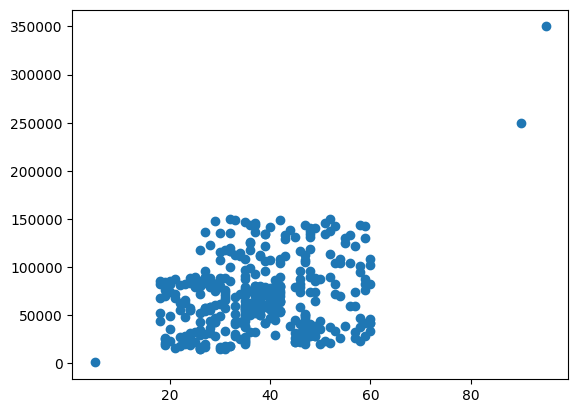

In [25]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [27]:
x_train.shape, x_test.shape

((282, 2), (121, 2))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [29]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

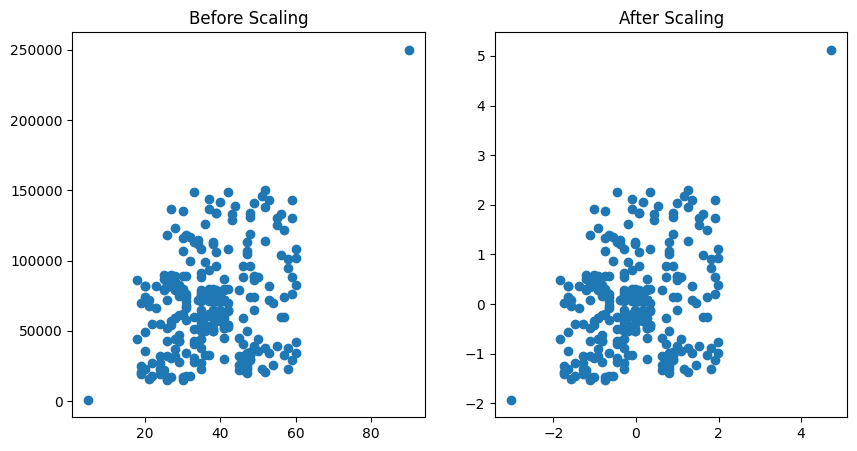

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()